In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report ,roc_auc_score ,roc_curve
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle

## **Data Collection**

importing or collecting dataset from any source.

In [ ]:
df = pd.read_csv("/content/creditcard.csv")
df.sample(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
75365,0.0,0.246076,48.0,Female,Central,NaN,Rented,Non-officer,Professional,0.0,358.000000,NaN,11.0,0.0,0.0,0.0,0.0,Good
27852,0.0,0.780641,73.0,Male,North,7645.0,Ownhouse,Self_Emp,Graduate,0.0,0.636804,7645.0,21.0,0.0,1.0,0.0,0.0,Good
122015,1.0,0.848641,37.0,Female,East,16000.0,Rented,Self_Emp,Post-Grad,0.0,0.564402,16000.0,16.0,0.0,7.0,0.0,2.0,Bad


## **Data Preprocessing**

understanding and modifing data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [ ]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


In [ ]:
df.isnull().sum()

,0
NPA Status,2
RevolvingUtilizationOfUnsecuredLines,2
age,2
Gender,2
Region,2
MonthlyIncome,29733
Rented_OwnHouse,2
Occupation,2
Education,2
NumberOfTime30-59DaysPastDueNotWorse,2


In [ ]:
df.tail(5)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [ ]:
df = df.drop([150001,150000] ,axis = 0)  # common NaN values in all the coulumns.

In [ ]:
df.shape

(150000, 18)

In [ ]:
df.isnull().sum()  # checking after removing observations.

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
Gender,0
Region,0
MonthlyIncome,29731
Rented_OwnHouse,0
Occupation,0
Education,0
NumberOfTime30-59DaysPastDueNotWorse,0


In [ ]:
# from above information we can observe that dataset has a duplicate feature [MonthlyIncome , MonthlyIncome.1]
# so we need to check both are same or not.
# if both are same we can remove one of those features.
c = 0
for i in df.index :
  if (df["MonthlyIncome.1"][i] == df["MonthlyIncome"][i]) or (np.isnan(df["MonthlyIncome.1"][i]) == np.isnan(df["MonthlyIncome"][i])) :
    pass
  else :
    c += 1
if c == 0 :
  df = df.drop(["MonthlyIncome.1"],axis = 1)

In [ ]:
df.shape # both having same data. so, we removed one column.

(150000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

if we observe in **"NumberOfDependents"** column the data is in float format but in information it is showing "object" so we need to convert it into numeric.

In [ ]:
# converting dtype of "NumberOfDependents"
df["NumberOfDependents"] = pd.to_numeric(df["NumberOfDependents"])
df["NumberOfDependents"].dtype

dtype('float64')

**We need to split the data into Train and Test part before going to feature engineering to overcome data leakage problem.**

In [ ]:
X = df.iloc[: , :-1] # Independent Data(Predictors)
y = df.iloc[: , -1] # Dependent(Target) data.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## **Feature Engineering**

### step1 : **Handling Missing Values**

In [ ]:
# Deviding numerical and categorical data to handle missing values easily;
# now we only focusing on Independent data [X_train , X_test];
X_train_numeric_columns = X_train.select_dtypes(exclude="object")  # numerical cols from X_train
X_train_categorical_columns = X_train.select_dtypes(include = "object")  # categorical cols from X_train

X_test_numeric_columns = X_test.select_dtypes(exclude="object")  # numerical cols from X_test
X_test_categorical_columns = X_test.select_dtypes(include="object") # categorical cols from X_test

In [ ]:
X_train_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104025,0.0,0.389826,38.0,2500.0,1.0,0.298281,4.0,0.0,0.0,0.0,0.0
5415,0.0,0.595526,55.0,1833.0,0.0,0.835333,11.0,0.0,1.0,0.0,0.0
75612,0.0,0.844664,34.0,5200.0,0.0,0.295328,6.0,0.0,0.0,0.0,3.0
138169,0.0,0.391980,40.0,9000.0,0.0,0.059771,2.0,0.0,0.0,0.0,5.0
87184,0.0,0.000000,55.0,2666.0,0.0,0.519685,6.0,0.0,1.0,0.0,0.0


In [ ]:
# checking null values in X_train_numericla_columns;
X_train_numeric_columns.isnull().sum()

,0
NPA Status,0
RevolvingUtilizationOfUnsecuredLines,0
age,0
MonthlyIncome,23767
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0
NumberOfTime60-89DaysPastDueNotWorse,0


**From above information data having null values in 2 columns [ "MonthlyIncome" , "NumberOfDependents"]**

we have 4 techiniques to handle missing values in numerical columns.


*   **Mean :** all the NaN values filled with the Mean of that perticular column. [ Note : after filling all NaN values become its Mean ]
*   **Median :** all the NaN values filled with the Median of that perticular column. [ Note : after filling all NaN values become its Median ]


*   **Mode :**  all the NaN values filled with the Mode of that perticular column. [ Note : after filling all NaN values become its Mode ]
*   **Random Sample Imputation :** all the NaN values filled with different random values from that perticular column. [ Note : it is the best technique to handle missing values.because, all the values are randomly selected. so, every NaN value can be replaced with an unique value. ]





**selecting best method**


*   we need to find the Standard Deviations of each column updated by different techniques.
*   we need to compare those Standard Deviations with Standard Deviation of original column.then we select the technique as best which STD is closer to the original STD.




In [ ]:
X_train_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104025,0.0,0.389826,38.0,2500.0,1.0,0.298281,4.0,0.0,0.0,0.0,0.0
5415,0.0,0.595526,55.0,1833.0,0.0,0.835333,11.0,0.0,1.0,0.0,0.0
75612,0.0,0.844664,34.0,5200.0,0.0,0.295328,6.0,0.0,0.0,0.0,3.0
138169,0.0,0.391980,40.0,9000.0,0.0,0.059771,2.0,0.0,0.0,0.0,5.0
87184,0.0,0.000000,55.0,2666.0,0.0,0.519685,6.0,0.0,1.0,0.0,0.0


In [ ]:
# Function to Handle missing values with "Random Sample Imputation" technique;
def handle_missing_values(data,column_name) :
  data["updated_" + column_name] = data[column_name].copy()  # creating new column with original column copy;
  random_vals = data[column_name].dropna().sample(data[column_name].isnull().sum()) # random non null values from that perticular column.
  random_vals.index = data[data[column_name].isnull()].index  # changing index values of random_values with the index values of null values.
  data.loc[data[column_name].isnull() , "updated_" + column_name ] = random_vals

  # plotting the original and updated columns :
  plt.figure(figsize=(6,8))
  data[column_name].plot(kind = "kde" , color = "r" , label = "Original_"+column_name)
  data["updated_" + column_name].plot(kind = "kde" , color = "black" , label = "updated_" + column_name)
  plt.legend(loc = 0)
  plt.show()

  # Standard Deviations ;
  print(f'Original column STD : {data[column_name].std()}')
  print(f'Updated column STD : {data["updated_"+column_name].std()}')

  data = data.drop(columns = [column_name], inplace = True) # droping original column after adding updated column.

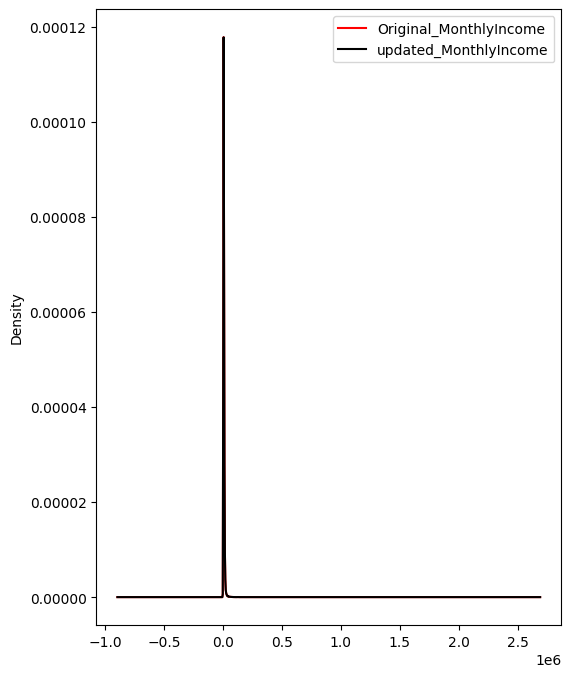

Original column STD : 11668.579441807507
Updated column STD : 12354.971876720367


In [ ]:
handle_missing_values(X_train_numeric_columns, "MonthlyIncome")

In [ ]:
X_train_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,updated_MonthlyIncome
104025,0.0,0.389826,38.0,1.0,0.298281,4.0,0.0,0.0,0.0,0.0,2500.0
5415,0.0,0.595526,55.0,0.0,0.835333,11.0,0.0,1.0,0.0,0.0,1833.0
75612,0.0,0.844664,34.0,0.0,0.295328,6.0,0.0,0.0,0.0,3.0,5200.0
138169,0.0,0.391980,40.0,0.0,0.059771,2.0,0.0,0.0,0.0,5.0,9000.0
87184,0.0,0.000000,55.0,0.0,0.519685,6.0,0.0,1.0,0.0,0.0,2666.0


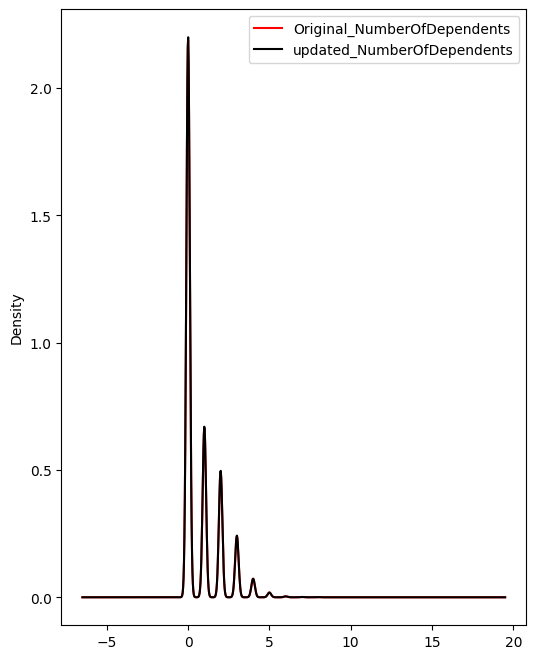

Original column STD : 1.1149433274454374
Updated column STD : 1.1140459890654595


In [ ]:
handle_missing_values(X_train_numeric_columns,"NumberOfDependents")

In [ ]:
X_train_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,updated_MonthlyIncome,updated_NumberOfDependents
104025,0.0,0.389826,38.0,1.0,0.298281,4.0,0.0,0.0,0.0,2500.0,0.0
5415,0.0,0.595526,55.0,0.0,0.835333,11.0,0.0,1.0,0.0,1833.0,0.0
75612,0.0,0.844664,34.0,0.0,0.295328,6.0,0.0,0.0,0.0,5200.0,3.0
138169,0.0,0.391980,40.0,0.0,0.059771,2.0,0.0,0.0,0.0,9000.0,5.0
87184,0.0,0.000000,55.0,0.0,0.519685,6.0,0.0,1.0,0.0,2666.0,0.0


In [ ]:
X_test_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
59770,0.0,1.000000,30.0,NaN,0.0,44.000000,0.0,0.0,0.0,0.0,0.0
21362,0.0,0.000000,57.0,7750.0,0.0,0.142562,9.0,0.0,1.0,0.0,0.0
127324,0.0,0.036569,48.0,6000.0,0.0,0.236294,6.0,0.0,2.0,0.0,3.0
140509,0.0,1.018331,41.0,4958.0,0.0,0.163138,4.0,0.0,0.0,0.0,0.0
144297,0.0,1.008799,49.0,NaN,0.0,3942.000000,10.0,0.0,1.0,0.0,0.0


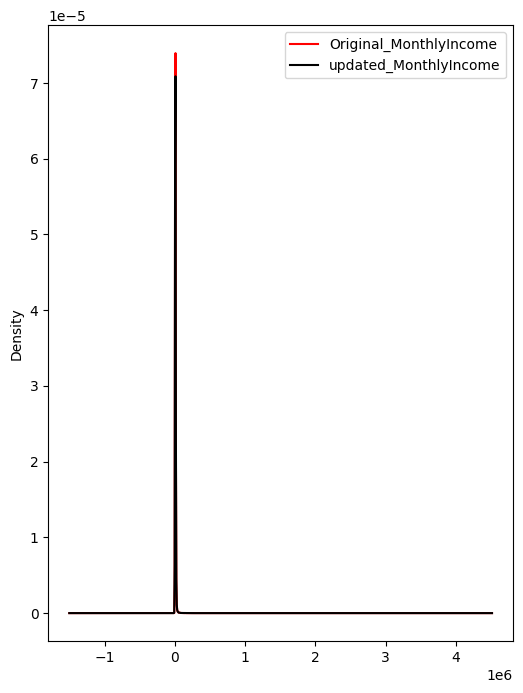

Original column STD : 22141.220414429128
Updated column STD : 26913.745863766108


In [ ]:
handle_missing_values(X_test_numeric_columns,"MonthlyIncome")

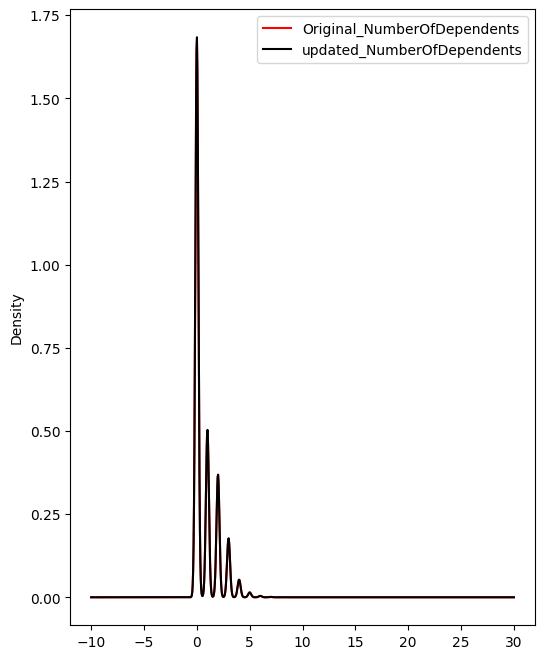

Original column STD : 1.1156296545022855
Updated column STD : 1.1142323936808547


In [ ]:
handle_missing_values(X_test_numeric_columns, "NumberOfDependents")

In [ ]:
X_test_numeric_columns.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,updated_MonthlyIncome,updated_NumberOfDependents
59770,0.0,1.000000,30.0,0.0,44.000000,0.0,0.0,0.0,0.0,1852.0,0.0
21362,0.0,0.000000,57.0,0.0,0.142562,9.0,0.0,1.0,0.0,7750.0,0.0
127324,0.0,0.036569,48.0,0.0,0.236294,6.0,0.0,2.0,0.0,6000.0,3.0
140509,0.0,1.018331,41.0,0.0,0.163138,4.0,0.0,0.0,0.0,4958.0,0.0
144297,0.0,1.008799,49.0,0.0,3942.000000,10.0,0.0,1.0,0.0,15000.0,0.0


## **Variable Transformation :**


*   it is nothing but the process of redusing the number of outliers.
* Variable transformation is critical for improving the accuracy, interpretability, and efficiency of models. By applying the appropriate transformations based on the nature of the data and the assumptions of the chosen model, you can:

* **Stabilize variance**
* **Handle skewness**
* **Improve normality**
* **Reduce the impact of outliers**
* **Improve linearity**
* **Ensure that machine learning models converge properly**

### **Techniques for Variable Transformation :**


*   Log Transformation
*   Reciprocal Transformation
*   Square Root Transformation
*   Exponential Transformation
*   Box-Cox Tranformation
*   YeoJohnson Transformation

we can select the best one from above thechniques to get best results after transformation.







In [ ]:
# first we need to check the columns with graphical representation ;
# function for visualization ;
def visualization_column(data , column) :
  print(column)
  plt.figure(figsize=(12,3))
  plt.subplot(1,3,1)
  plt.title("Normal Distribution")
  data[column].plot(kind="kde" , color = "r")
  plt.subplot(1,3,2)
  plt.title("BoxPlot")
  sns.boxplot(x = data[column], color = "b")
  plt.subplot(1,3,3)
  plt.title("ProbPlot")
  stats.probplot(x = data[column] , dist = "norm" , plot = plt)
  plt.show()

NPA Status


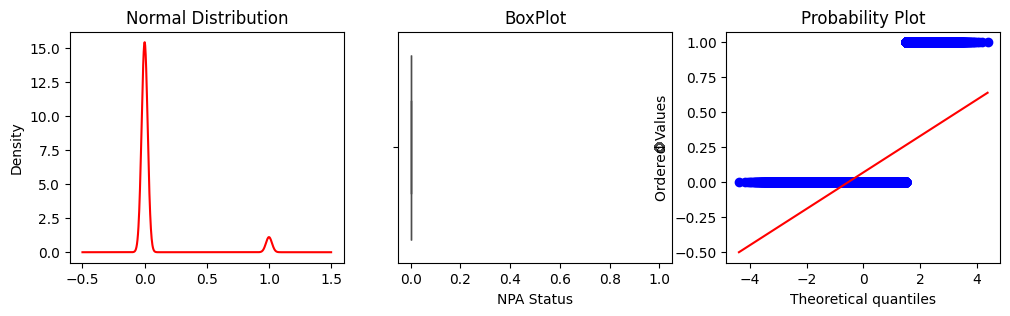

RevolvingUtilizationOfUnsecuredLines


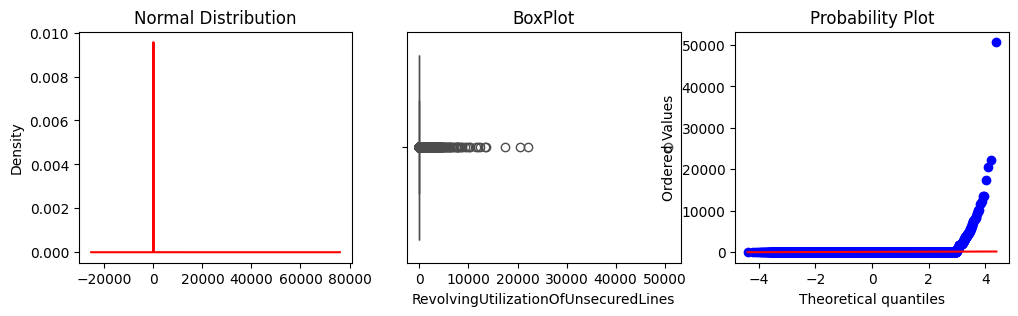

age


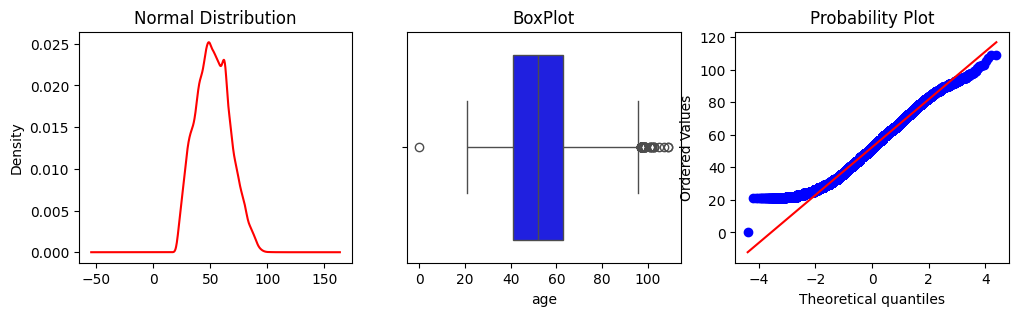

NumberOfTime30-59DaysPastDueNotWorse


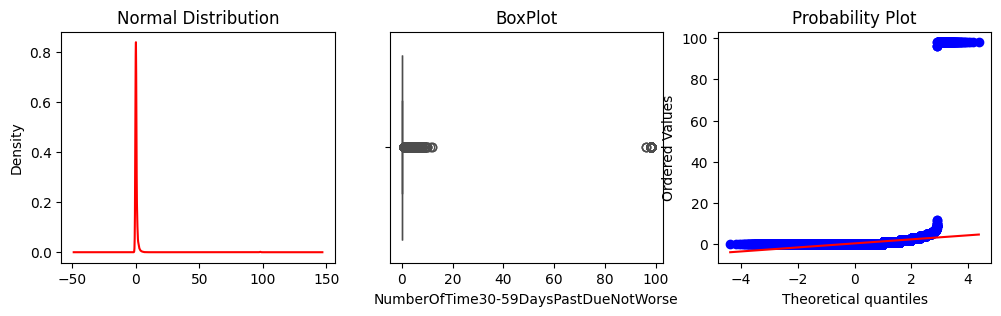

DebtRatio


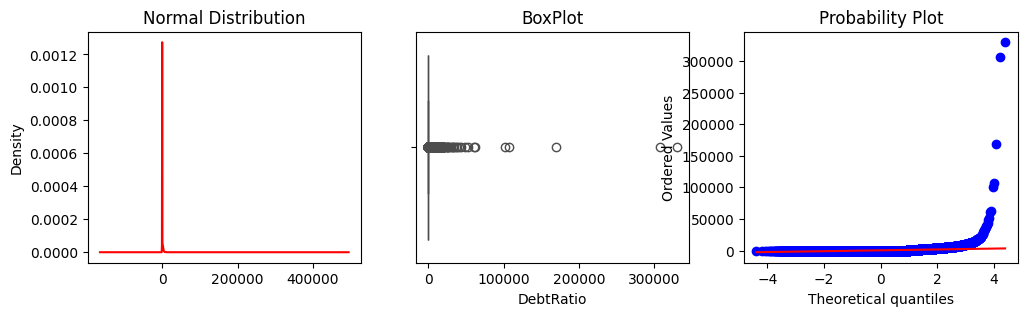

NumberOfOpenCreditLinesAndLoans


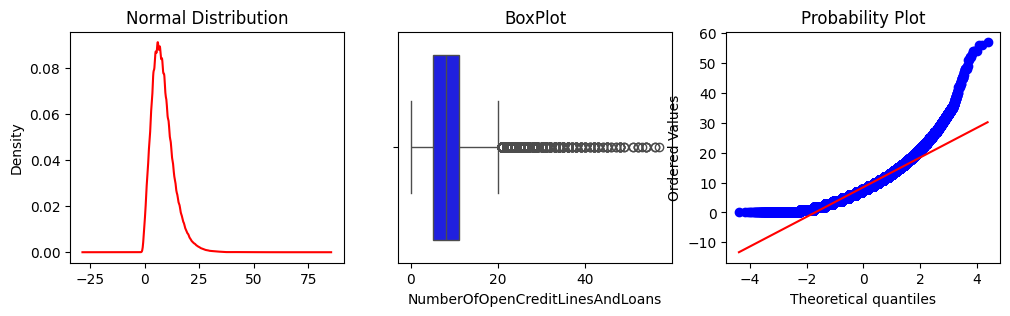

NumberOfTimes90DaysLate


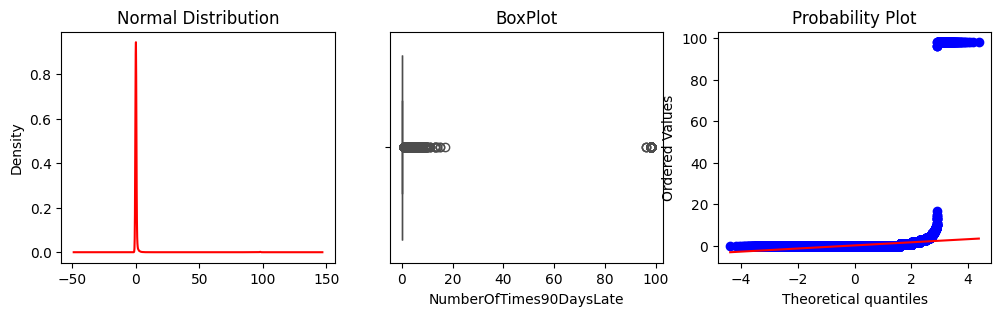

NumberRealEstateLoansOrLines


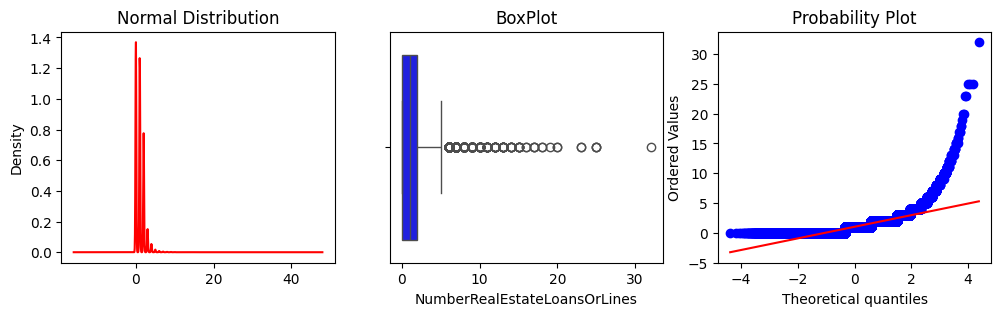

NumberOfTime60-89DaysPastDueNotWorse


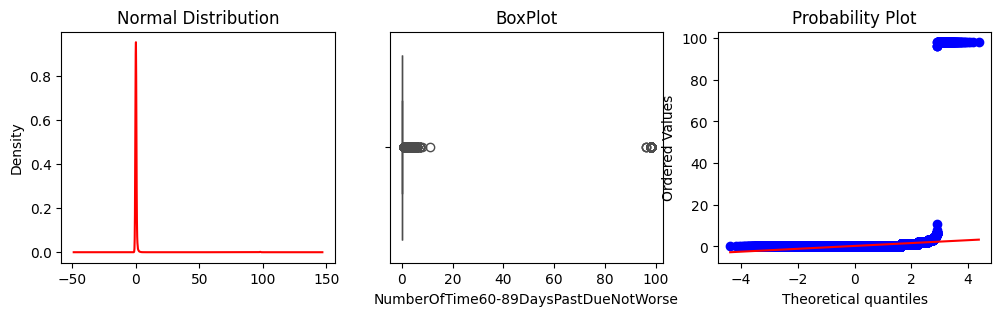

updated_MonthlyIncome


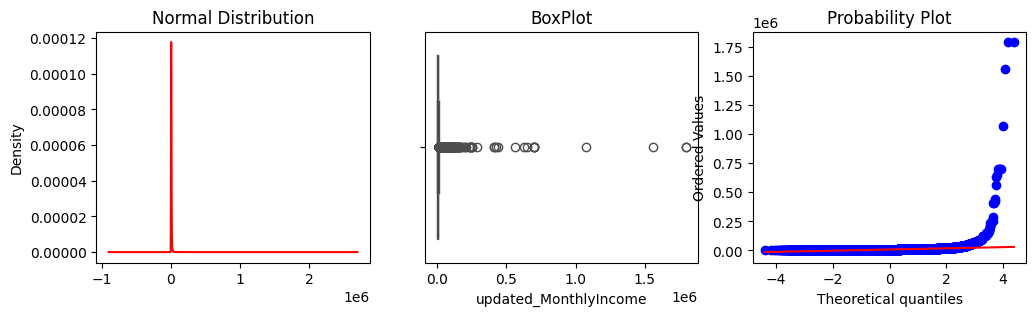

updated_NumberOfDependents


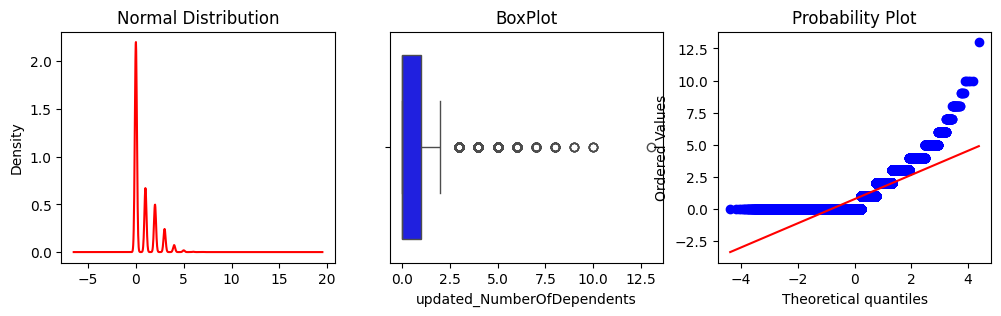

In [ ]:
for i in X_train_numeric_columns.columns :
  visualization_column(X_train_numeric_columns , i)

**Now we need to Transform the columns with best technique.**
Generally, for that we need to check each column with different techniques and pick the best one for each column.

but here i am taking "log technique" for all the columns.

In [ ]:
# Log technique :
def var_trasform(old_data , col , new_data) :
  new_data[col+ "_log"] = np.log(old_data[col]+1)

In [ ]:
new_X_train_numeric_cols = pd.DataFrame()
for i in X_train_numeric_columns.columns :
  var_trasform(X_train_numeric_columns , i , new_X_train_numeric_cols)

In [ ]:
X_train_numeric_columns = new_X_train_numeric_cols

NPA Status_log


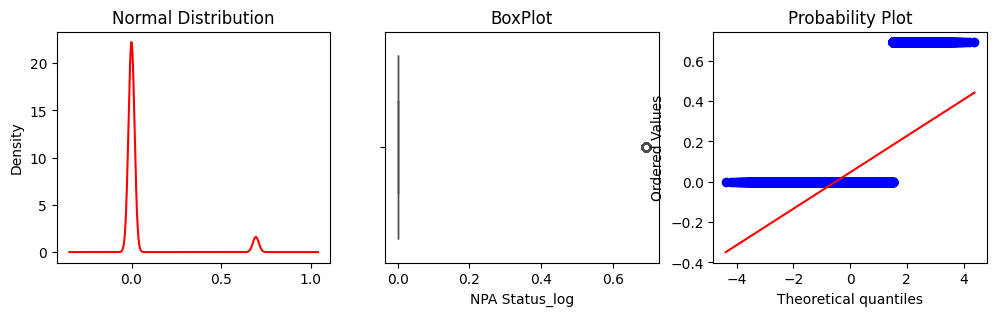

RevolvingUtilizationOfUnsecuredLines_log


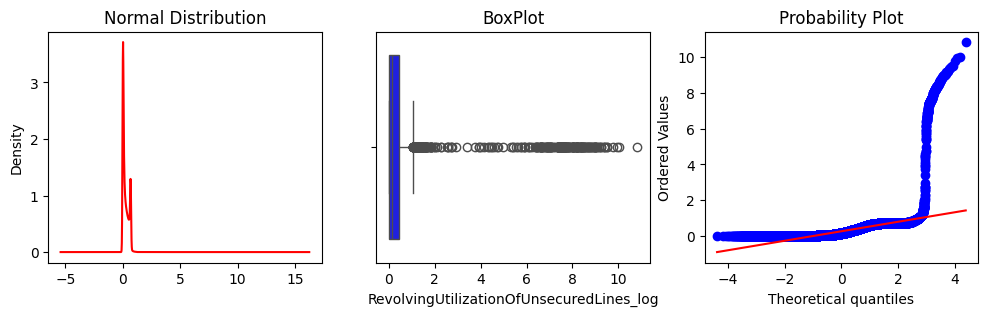

age_log


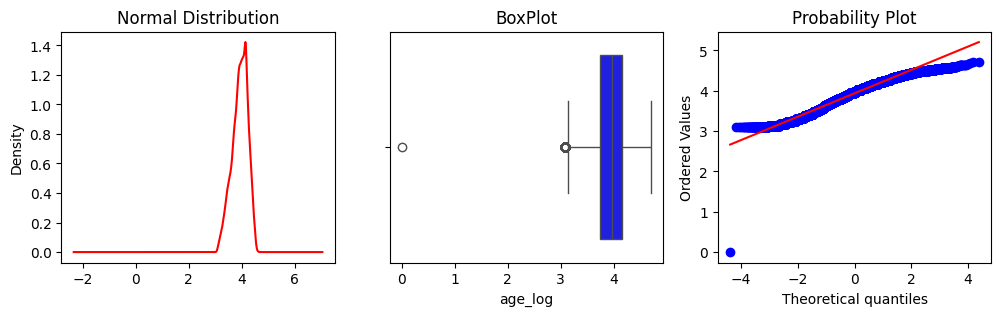

NumberOfTime30-59DaysPastDueNotWorse_log


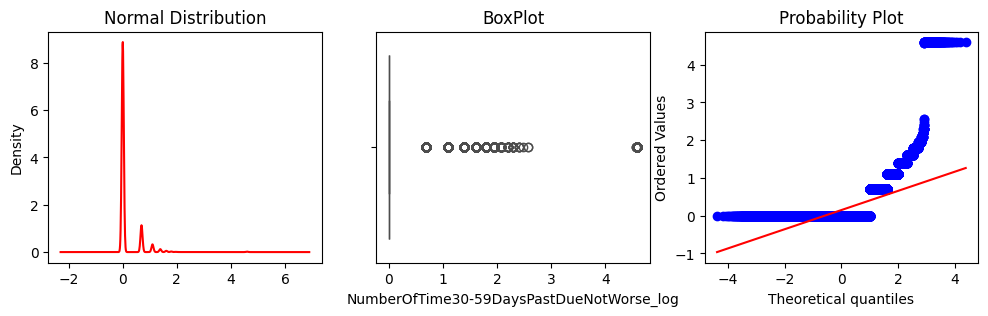

DebtRatio_log


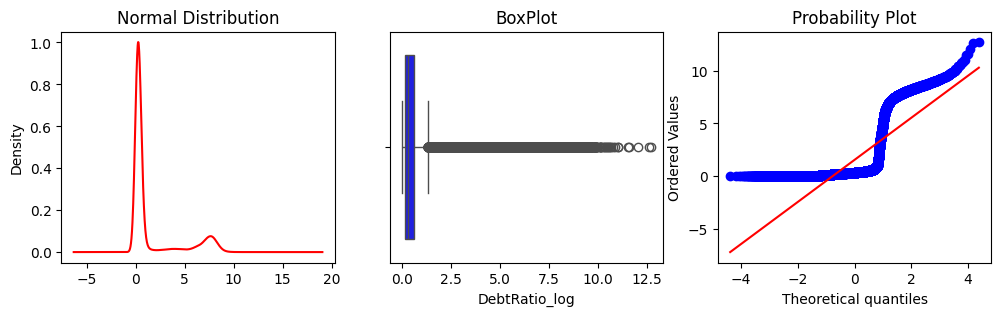

NumberOfOpenCreditLinesAndLoans_log


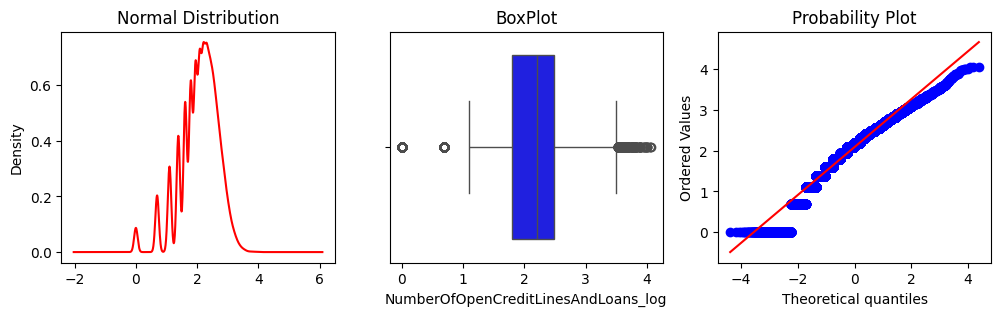

NumberOfTimes90DaysLate_log


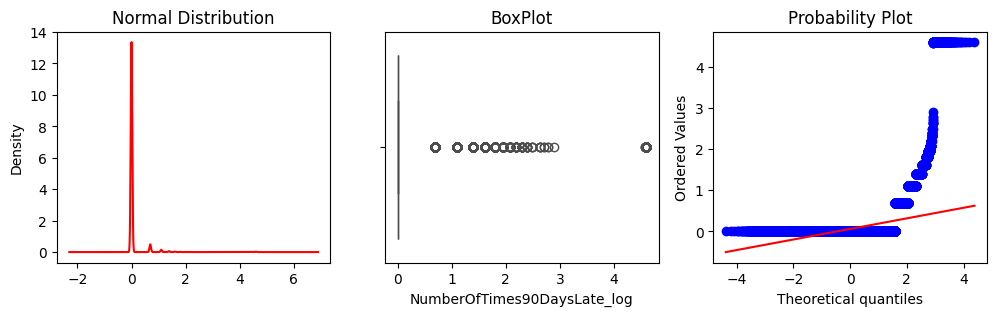

NumberRealEstateLoansOrLines_log


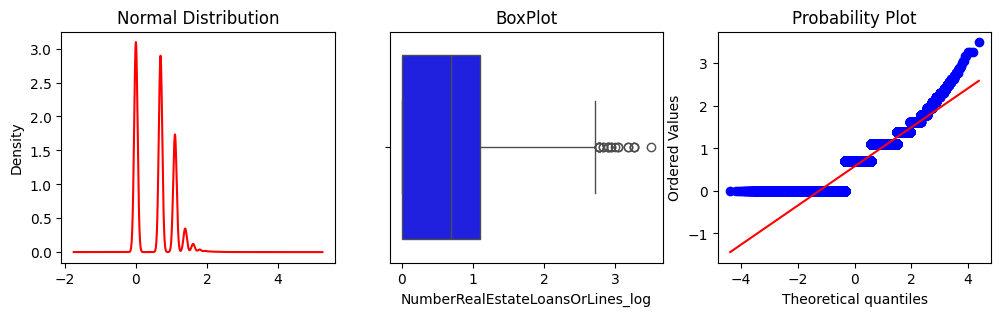

NumberOfTime60-89DaysPastDueNotWorse_log


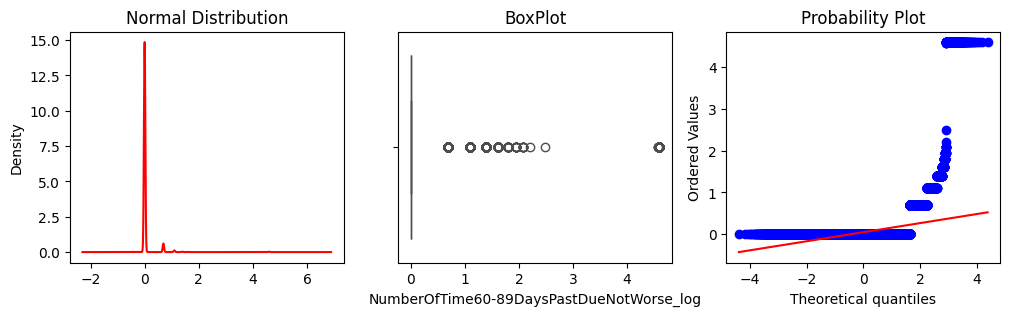

updated_MonthlyIncome_log


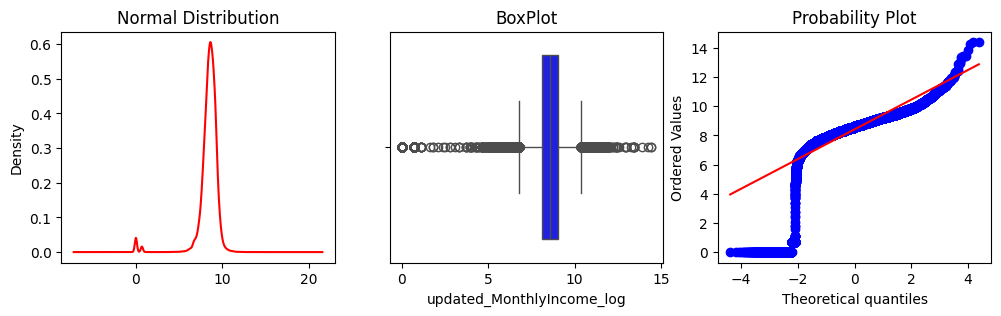

updated_NumberOfDependents_log


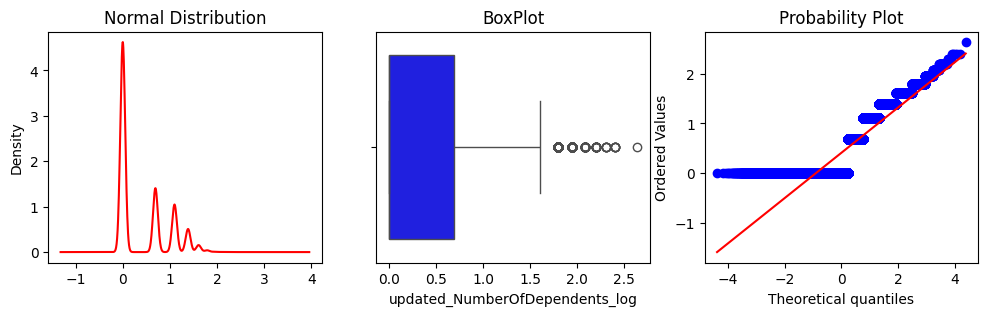

In [ ]:
for i in X_train_numeric_columns.columns :
  visualization_column(X_train_numeric_columns , i)

In [ ]:
new_X_test_numeric_cols = pd.DataFrame()
for i in X_test_numeric_columns.columns :
  var_trasform(X_test_numeric_columns , i , new_X_test_numeric_cols)

In [ ]:
X_test_numeric_columns = new_X_test_numeric_cols

In [ ]:
X_test_numeric_columns.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'updated_MonthlyIncome_log',
       'updated_NumberOfDependents_log'],
      dtype='object')

## **Handling Outliers**
* we have different techniques to handle outliers.
* **Trimming :** removing outlier points.
* **Capping :** Imputing(replacing outliers with bound values) values insted of removing.
* Methods :
  * IQR Method
  * 5th and 95th Quantile
  * 1st and 99th Quantile
  * mean - 3rd std and mean + 3rd std


In [ ]:
# outlier handling function ;
def outlier_handling(data,var):
  upper_limit = data[var].quantile(0.95)
  lower_limit = data[var].quantile(0.05)

  return upper_limit,lower_limit

In [ ]:
# here we are using Capping to handle outliers ; "5th and 95th quantile Technnique for above data"
for i in X_train_numeric_columns.columns :
  lower_limit , upper_limit = outlier_handling(X_train_numeric_columns , i)
  X_train_numeric_columns[i+'_5th'] = X_train_numeric_columns[i].clip(lower=lower_limit, upper=upper_limit)

In [ ]:
X_train_numeric_columns = X_train_numeric_columns.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'updated_MonthlyIncome_log',
       'updated_NumberOfDependents_log'] , axis = 1)

In [ ]:
len(X_train_numeric_columns.columns)

11

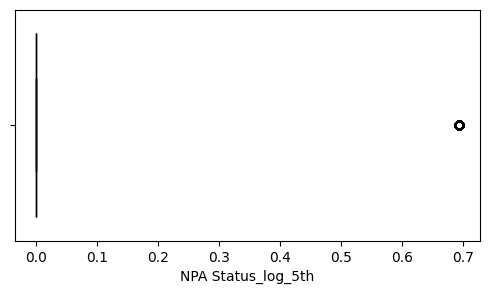

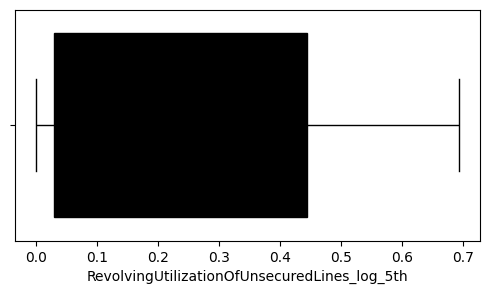

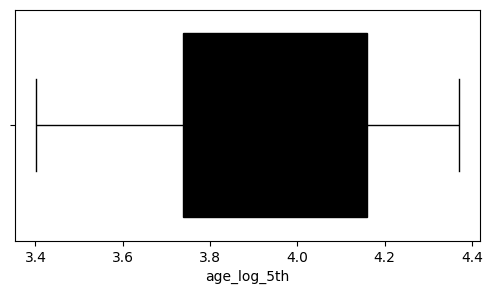

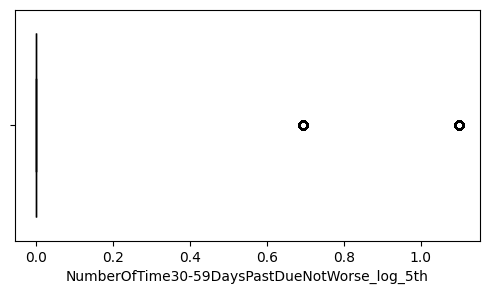

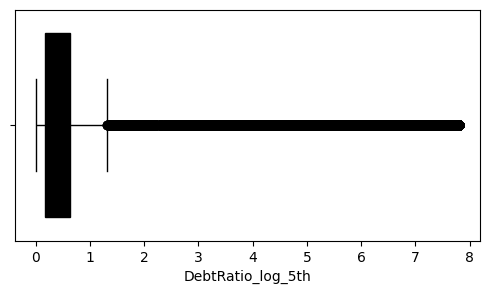

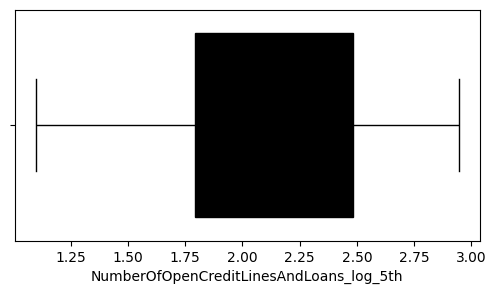

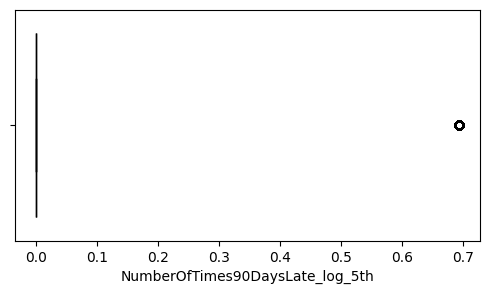

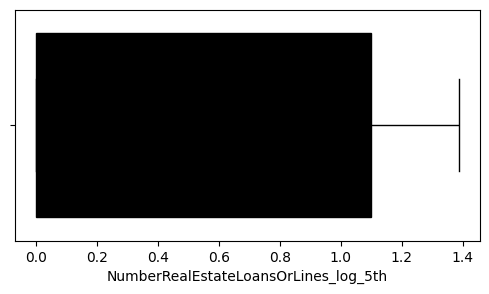

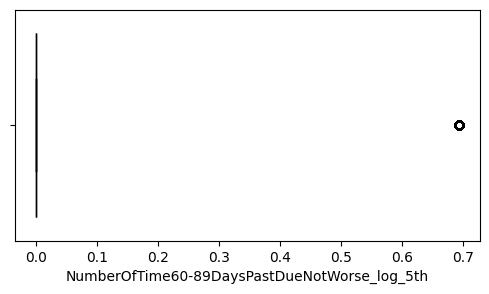

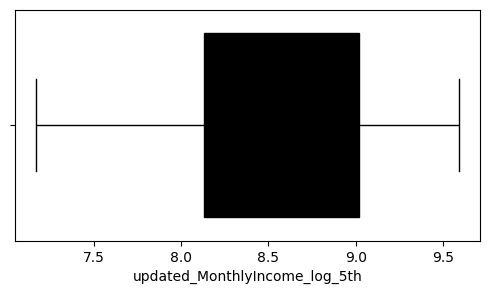

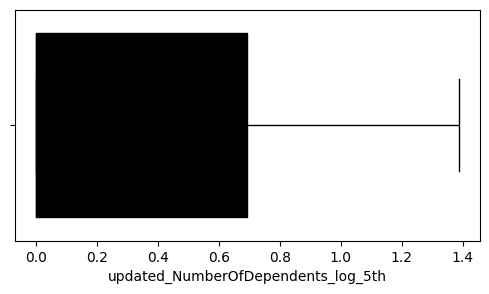

In [ ]:
# visualization
for i in X_train_numeric_columns.columns :
  plt.figure(figsize=(6,3))
  sns.boxplot(x = X_train_numeric_columns[i] , color = "black")
  plt.show()

**From above visualization we can observe that the feature DebitRatio is not handled properly with 5th and 95th method so we need to apply another method to handle properly for that perticular feature.**

here i am applying IQR method.

In [ ]:
def iqr_method(data , var) :
  iqr = data[var].quantile(0.75) - data[var].quantile(0.25)
  lower_limit = data[var].quantile(0.25) - (1.5*iqr)
  upper_limit = data[var].quantile(0.75) + (1.5*iqr)
  return lower_limit , upper_limit

In [ ]:
lo_l , up_l = iqr_method(X_train_numeric_columns , "DebtRatio_log_5th")
X_train_numeric_columns['DebtRatio_log_IQR'] = X_train_numeric_columns['DebtRatio_log_5th'].clip(lower=lo_l , upper = up_l)

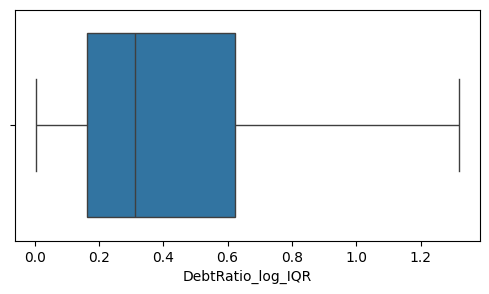

In [ ]:
plt.figure(figsize=(6,3))
sns.boxplot(x = X_train_numeric_columns['DebtRatio_log_IQR'])
plt.show()

In [ ]:
X_train_numeric_columns = X_train_numeric_columns.drop("DebtRatio_log_5th" , axis = 1)

In [ ]:
X_train_numeric_columns.columns

Index(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'age_log_5th', 'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'updated_MonthlyIncome_log_5th', 'updated_NumberOfDependents_log_5th',
       'DebtRatio_log_IQR'],
      dtype='object')

## **X_test**
same process for **X_test**.

In [ ]:
for i in X_test_numeric_columns.columns :
  l_l , u_l = outlier_handling(X_test_numeric_columns , i)
  X_test_numeric_columns[i + "_5th"] = X_test_numeric_columns[i].clip(lower = l_l , upper = u_l)


In [ ]:
X_test_numeric_columns.columns

Index(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'updated_MonthlyIncome_log',
       'updated_NumberOfDependents_log', 'NPA Status_log_5th',
       'RevolvingUtilizationOfUnsecuredLines_log_5th', 'age_log_5th',
       'NumberOfTime30-59DaysPastDueNotWorse_log_5th', 'DebtRatio_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'updated_MonthlyIncome_log_5th', 'updated_NumberOfDependents_log_5th'],
      dtype='object')

In [ ]:
l_l , u_l = iqr_method(X_test_numeric_columns,"DebtRatio_log_5th")
X_test_numeric_columns["DebtRatio_log_IQR"] = X_test_numeric_columns["DebtRatio_log_5th"].clip(lower = l_l , upper = u_l)

In [ ]:
X_test_numeric_columns = X_test_numeric_columns.drop(['NPA Status_log', 'RevolvingUtilizationOfUnsecuredLines_log', 'age_log',
       'NumberOfTime30-59DaysPastDueNotWorse_log', 'DebtRatio_log',
       'NumberOfOpenCreditLinesAndLoans_log', 'NumberOfTimes90DaysLate_log',
       'NumberRealEstateLoansOrLines_log',
       'NumberOfTime60-89DaysPastDueNotWorse_log', 'updated_MonthlyIncome_log',
       'updated_NumberOfDependents_log',"DebtRatio_log_5th"] , axis = 1)

In [ ]:
X_test_numeric_columns.columns

Index(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'age_log_5th', 'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'updated_MonthlyIncome_log_5th', 'updated_NumberOfDependents_log_5th',
       'DebtRatio_log_IQR'],
      dtype='object')

#### **Converting Text to Numerical data .**

In [ ]:
X_train_categorical_columns.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
104025,Female,West,Ownhouse,Self_Emp,Graduate
5415,Male,South,Ownhouse,Self_Emp,Matric
75612,Female,Central,Rented,Non-officer,Professional
138169,Male,West,Ownhouse,Non-officer,Professional
87184,Female,Central,Ownhouse,Non-officer,Graduate


In [ ]:
one_hot = OneHotEncoder()
one_hot.fit(X_train_categorical_columns[['Gender','Region']])

OneHotEncoder()

In [ ]:
one_hot_result = one_hot.transform(X_train_categorical_columns[['Gender','Region']]).toarray()

In [ ]:
for i in range(len(one_hot.get_feature_names_out())) :
  X_train_categorical_columns[one_hot.get_feature_names_out()[i]] = one_hot_result[: , i]

In [ ]:
X_train_categorical_columns = X_train_categorical_columns.drop(['Gender','Region'] , axis = 1)
X_train_categorical_columns.head()


,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
104025,Ownhouse,Self_Emp,Graduate,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5415,Ownhouse,Self_Emp,Matric,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75612,Rented,Non-officer,Professional,1.0,0.0,1.0,0.0,0.0,0.0,0.0
138169,Ownhouse,Non-officer,Professional,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87184,Ownhouse,Non-officer,Graduate,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
one_hot_result_test = one_hot.transform(X_test_categorical_columns[["Gender" , "Region"]]).toarray()

In [ ]:
for i in range(len(one_hot.get_feature_names_out())) :
  X_test_categorical_columns[one_hot.get_feature_names_out()[i]] = one_hot_result_test[: , i]

In [ ]:
X_test_categorical_columns = X_test_categorical_columns.drop(["Gender" , "Region"] , axis = 1)

In [ ]:
X_test_categorical_columns.head()

,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
59770,Rented,Self_Emp,Professional,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21362,Rented,Officer3,Post-Grad,1.0,0.0,0.0,0.0,1.0,0.0,0.0
127324,Rented,Officer1,Post-Grad,1.0,0.0,0.0,1.0,0.0,0.0,0.0
140509,Rented,Non-officer,Professional,0.0,1.0,0.0,0.0,0.0,0.0,1.0
144297,Rented,Officer2,Professional,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# converting remaining columns using Ordinal Encoder :
ord_enc = OrdinalEncoder()
ord_enc.fit(X_train_categorical_columns[['Rented_OwnHouse','Occupation','Education']])

OrdinalEncoder()

In [ ]:
ord_enc_res_train = ord_enc.transform(X_train_categorical_columns[['Rented_OwnHouse','Occupation','Education']])

In [ ]:
for i in range(len(ord_enc.get_feature_names_out())) :
  X_train_categorical_columns[ord_enc.get_feature_names_out()[i]] = ord_enc_res_train[: , i]

In [ ]:
X_train_categorical_columns.head()

,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
104025,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5415,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75612,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
138169,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87184,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_categorical_columns["Rented_OwnHouse"].unique()

array(['Rented', 'Ownhouse'], dtype=object)

In [ ]:
# test data ;
ord_enc_res_test = ord_enc.transform(X_test_categorical_columns[["Rented_OwnHouse" , "Occupation" , "Education"]])

In [ ]:
for i in range(len(ord_enc.get_feature_names_out())) :
  X_test_categorical_columns[ord_enc.get_feature_names_out()[i]] = ord_enc_res_test[: , i]

In [ ]:
X_test_categorical_columns.head()

,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
59770,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21362,1.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
127324,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
140509,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
144297,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 104025 to 121958
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rented_OwnHouse  120000 non-null  float64
 1   Occupation       120000 non-null  float64
 2   Education        120000 non-null  float64
 3   Gender_Female    120000 non-null  float64
 4   Gender_Male      120000 non-null  float64
 5   Region_Central   120000 non-null  float64
 6   Region_East      120000 non-null  float64
 7   Region_North     120000 non-null  float64
 8   Region_South     120000 non-null  float64
 9   Region_West      120000 non-null  float64
dtypes: float64(10)
memory usage: 10.1 MB


In [ ]:
X_test_categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 59770 to 49315
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rented_OwnHouse  30000 non-null  float64
 1   Occupation       30000 non-null  float64
 2   Education        30000 non-null  float64
 3   Gender_Female    30000 non-null  float64
 4   Gender_Male      30000 non-null  float64
 5   Region_Central   30000 non-null  float64
 6   Region_East      30000 non-null  float64
 7   Region_North     30000 non-null  float64
 8   Region_South     30000 non-null  float64
 9   Region_West      30000 non-null  float64
dtypes: float64(10)
memory usage: 2.5 MB


#### **Target Variable**

In [ ]:
y_train.head()
label_enc = LabelEncoder()
label_enc.fit(y_train)

LabelEncoder()

In [ ]:
label_enc_y_train = label_enc.transform(y_train)
label_enc_y_test = label_enc.transform(y_test)

In [ ]:
target_train = pd.DataFrame({"encoded_y" : label_enc_y_train})
target_test = pd.DataFrame({"encoded_y" : label_enc_y_test})

In [ ]:
target_train["encoded_y"].unique()

array([1, 0])

**We have done with Encoding Categorical data**

## **Feature Selection**
**Feature Selection** is nothing but selecting the best features to give best results in prediction.
* we have different techniques to perform feature selection :
  * constant technique(can remove feature if varience = 0)
  * quasi constant technique(can remove feature if varience close to 0)
  * correlation coefficient
  * chi-square-test(hypothesis test)

In [ ]:
X_train_numeric_columns.columns

Index(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'age_log_5th', 'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'updated_MonthlyIncome_log_5th', 'updated_NumberOfDependents_log_5th',
       'DebtRatio_log_IQR'],
      dtype='object')

In [ ]:
# constant technique ;
const_tech = VarianceThreshold(threshold=0.0)
const_tech.fit(X_train_numeric_columns)

VarianceThreshold()

In [ ]:
cols_var_0 = X_train_numeric_columns.columns[~const_tech.get_support()] # returns array of column names having variance 0;
cols_var_0 # returns empty array. because, there is no column with variance 0 ;

Index([], dtype='object')

In [ ]:
# Quasi constant technique ;
quasi_tech = VarianceThreshold(threshold=0.1)
quasi_tech.fit(X_train_numeric_columns)

VarianceThreshold(threshold=0.1)

In [ ]:
cols_var_close_0 = X_train_numeric_columns.columns[~quasi_tech.get_support()]

In [ ]:
cols_var_close_0 # returns array of column names having varience close to 0 ; so we can remove those columns.

Index(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'age_log_5th', 'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th'],
      dtype='object')

In [ ]:
X_train_numeric_columns = X_train_numeric_columns.drop(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th'],axis = 1)

In [ ]:
X_train_numeric_columns.columns

Index(['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th', 'DebtRatio_log_IQR'],
      dtype='object')

In [ ]:
X_test_numeric_columns.columns

Index(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'age_log_5th', 'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberRealEstateLoansOrLines_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th',
       'updated_MonthlyIncome_log_5th', 'updated_NumberOfDependents_log_5th',
       'DebtRatio_log_IQR'],
      dtype='object')

In [ ]:
X_test_numeric_columns = X_test_numeric_columns.drop(['NPA Status_log_5th', 'RevolvingUtilizationOfUnsecuredLines_log_5th',
       'NumberOfTime30-59DaysPastDueNotWorse_log_5th',
       'NumberOfTimes90DaysLate_log_5th',
       'NumberOfTime60-89DaysPastDueNotWorse_log_5th'],axis = 1)

In [ ]:
X_test_numeric_columns.columns

Index(['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th', 'DebtRatio_log_IQR'],
      dtype='object')

In [ ]:
# NOW we are applying Hypothesis testing;
# we need to find correlation and p-value for each predictor with target
corr_p_value = []
for i in X_train_numeric_columns.columns :
  corr_p_value.append(stats.pearsonr(X_train_numeric_columns[i] , target_train["encoded_y"]))
corr_p_value = np.array(corr_p_value)

In [ ]:
p_values = corr_p_value[: , 1]
p_values

array([0.00000000e+00, 3.41166578e-57, 6.52750042e-35, 1.88678533e-68,
       3.44808577e-51, 4.09007145e-01])

In [ ]:
data_p_value = pd.Series(data = p_values , index = X_train_numeric_columns.columns)

<Axes: >

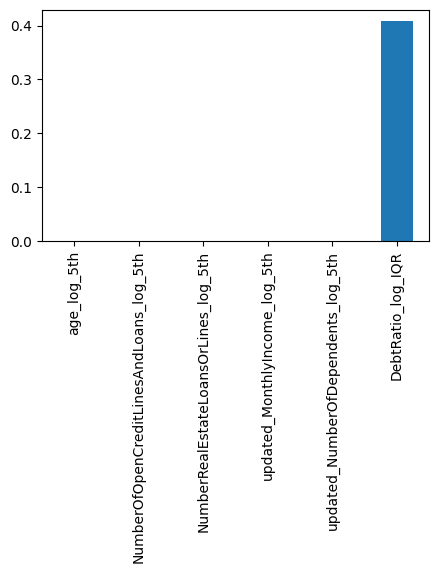

In [ ]:
plt.figure(figsize = (5,3))
data_p_value.plot.bar()

In [ ]:
# we can remove the columns having p-value morethan 0.05 ;
X_train_numeric_columns = X_train_numeric_columns.drop('DebtRatio_log_IQR' , axis = 1)
X_test_numeric_columns = X_test_numeric_columns.drop('DebtRatio_log_IQR' , axis = 1)

**After all the Processing of data we need to combile numerical and categorical data together.**

In [ ]:
X_train_data = pd.concat([X_train_numeric_columns,X_train_categorical_columns],axis = 1)
X_train_data.head()

,age_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,updated_MonthlyIncome_log_5th,updated_NumberOfDependents_log_5th,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
104025,3.663562,1.609438,0.000000,7.824446,0.000000,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5415,4.025352,2.484907,0.693147,7.514255,0.000000,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
75612,3.555348,1.945910,0.000000,8.556606,1.386294,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
138169,3.713572,1.098612,0.000000,9.105091,1.386294,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
87184,4.025352,1.945910,0.693147,7.888710,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_data = pd.concat([X_test_numeric_columns,X_test_categorical_columns],axis = 1)
X_test_data.head()

,age_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,updated_MonthlyIncome_log_5th,updated_NumberOfDependents_log_5th,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
59770,3.433987,1.098612,0.000000,7.524561,0.000000,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21362,4.060443,2.302585,0.693147,8.955577,0.000000,1.0,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
127324,3.891820,1.945910,1.098612,8.699681,1.386294,1.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
140509,3.737670,1.609438,0.000000,8.508959,0.000000,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
144297,3.912023,2.397895,0.693147,9.592134,0.000000,1.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


**Finally we completed with Preprocessing and feature selection**

now we need to check the data is balanced or not:
 * **Data Balancing** is nothing but making the no of occurences of each label in target variable equal or colse to equal to each other in training data.
    * for Example labels of target is "Good" and "Bad" , total no of rows are 10000. if "Good" occured in 8000 times and "Bad" occured in 2000 times in training data.then we get predicted values as "Good" only. because of the data is not balanced.

    * we have techniques to balance the data :
      * **Oversampling :**
        * Increase the number of instances in the minority class by duplicating or synthesizing new examples.means rows will be increased by making new rows with basis of sample rows by incremetation .
        * SMOTE (Synthetic Minority Oversampling Technique): Create synthetic samples by interpolating between existing minority class samples.
      * **Undersamplng :** mostly we don't use this method. because it reduses the rows of the data.

In [ ]:
y_train_data = target_train["encoded_y"]
y_test_data = target_test["encoded_y"]

In [ ]:
# first we need to check the data is balanced or not ;
y_train_data.value_counts()

,count
encoded_y,
1,111930
0,8070


In [ ]:
# the data is not balanced. so, we need to balance the data.
# here we are using SMOTE to balance the data.
smote = SMOTE(random_state=42)
balanced_X_train , balanced_y_train = smote.fit_resample(X_train_data , y_train_data)

In [ ]:
balanced_y_train.value_counts()  # data balanced by increasing data according to old data.

,count
encoded_y,
1,111930
0,111930


### **Feature Scaling :**
feature scaling is nothing but scaling down the values in variable .
generally we perform feature scaling on Numerical columns only ;
* Different methods in feature scaling :
  * StandardScalar (Z-score) :
    * in this we use Mean and Standard Deviation of the variable to scale down the values in the variable.
    * Formula :- new_point = (old_point - mean) / std
  * MinMaxScalar :
    * in this we use Min value and Max value of the variable to scale down the values in the variable.
    * Formula :- new_point = (old_point - Min_value) / (Max_value - Min_value)

In [ ]:
# Scaling down numerical coumns using Standard Scalar (Z- Score) :
balanced_X_train.head()

,age_log_5th,NumberOfOpenCreditLinesAndLoans_log_5th,NumberRealEstateLoansOrLines_log_5th,updated_MonthlyIncome_log_5th,updated_NumberOfDependents_log_5th,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West
0,3.663562,1.609438,0.000000,7.824446,0.000000,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.025352,2.484907,0.693147,7.514255,0.000000,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3.555348,1.945910,0.000000,8.556606,1.386294,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.713572,1.098612,0.000000,9.105091,1.386294,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4.025352,1.945910,0.693147,7.888710,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
num_cols =  balanced_X_train.loc[: ,['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th']]

In [ ]:
ss = StandardScaler()
ss.fit(num_cols)

StandardScaler()

In [ ]:
res = ss.transform(num_cols)

In [ ]:
scaled_cols = pd.DataFrame(res , columns= ["age" , "NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines" , "updated_MonthlyIncome" ,"updated_NumberOfDependents"])

In [ ]:
scaled_cols.index = balanced_X_train.index

In [ ]:
balanced_X_train = balanced_X_train.drop(['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th'] , axis = 1)

In [ ]:
for i in scaled_cols.columns :
  balanced_X_train[i] = scaled_cols[i]

In [ ]:
balanced_X_train.head()

,Rented_OwnHouse,Occupation,Education,Gender_Female,Gender_Male,Region_Central,Region_East,Region_North,Region_South,Region_West,age,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,updated_MonthlyIncome,updated_NumberOfDependents
0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.827252,-0.845334,-1.101543,-1.076223,-0.834719
1,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.548195,0.779027,0.325612,-1.581623,-0.834719
2,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.238656,-0.221037,-1.101543,0.116699,1.819026
3,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.637123,-1.793130,-1.101543,1.010355,1.819026
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.548195,-0.221037,0.325612,-0.971517,-0.834719


In [ ]:
test_num_cols = X_test_data.loc[ : , ['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th']]

In [ ]:
test_res = ss.transform(test_num_cols)

In [ ]:
scaled_test_data = pd.DataFrame(test_res , columns = ["age" , "NumberOfOpenCreditLinesAndLoans","NumberRealEstateLoansOrLines" , "updated_MonthlyIncome" ,"updated_NumberOfDependents"])

In [ ]:
scaled_test_data.index = X_test_data.index

In [ ]:
for i in scaled_test_data.columns :
  X_test_data[i] = scaled_test_data[i]


In [ ]:
X_test_data = X_test_data.drop(['age_log_5th', 'NumberOfOpenCreditLinesAndLoans_log_5th',
       'NumberRealEstateLoansOrLines_log_5th', 'updated_MonthlyIncome_log_5th',
       'updated_NumberOfDependents_log_5th'] , axis = 1)

**NOW the data is perfect to build a MODEL.**

In [ ]:
def algo_process(algo,x_train, y_train , x_test , y_test) :
  algo.fit(x_train,y_train)
  y_test_pred = algo.predict(x_test)
  print(f'Training Accuracy : {algo.score(x_train,y_train)}')
  print(f'Test Accuracy : {algo.score(x_test,y_test)}')

  print(f'Confusion Matrix Test data : {confusion_matrix(y_test,y_test_pred)}')
  print(f'classification Report Test data : {classification_report(y_test,y_test_pred)}')

In [ ]:
def knn_algo(x_train, y_train , x_test , y_test) :
  print("-----------------------------KNN-------------------------")
  k_values = [i for i in range(2,50) if i%2 != 0]
  acc_list = []
  for i in k_values :
    algo = KNeighborsClassifier(n_neighbors=i)
    algo.fit(x_train,y_train)
    acc_list.append(accuracy_score(y_test,algo.predict(x_test)))
  k_value = k_values[acc_list.index(max(acc_list))]
  knn = KNeighborsClassifier(n_neighbors=k_value)
  algo_process(knn ,x_train, y_train , x_test , y_test )



In [ ]:
def navie_bayes(x_train, y_train , x_test , y_test) :
  print("-----------------------------Navie Bayes-------------------------")
  nb = GaussianNB()
  algo_process(nb ,x_train, y_train , x_test , y_test )

In [ ]:
def log_reg(x_train, y_train , x_test , y_test) :
  print("-----------------------------Logistic Regression-------------------------")
  log = LogisticRegression()
  algo_process(log ,x_train, y_train , x_test , y_test )

In [ ]:
def d_tree(x_train, y_train , x_test , y_test) :
  print("-----------------------------Decision Tree-------------------------")
  dt = DecisionTreeClassifier(criterion="entropy")
  algo_process(dt ,x_train, y_train , x_test , y_test )

In [ ]:
def random_forest(x_train, y_train , x_test , y_test) :
  print("-----------------------------Random Forest-------------------------")
  rt = RandomForestClassifier(n_estimators= 10 , criterion="entropy")
  algo_process(rt ,x_train, y_train , x_test , y_test )

In [ ]:
def all_algos(x_train, y_train , x_test , y_test) :
  #knn_algo(x_train, y_train , x_test , y_test)
  navie_bayes(x_train, y_train , x_test , y_test)
  log_reg(x_train, y_train , x_test , y_test)
  d_tree(x_train, y_train , x_test , y_test)
  random_forest(x_train, y_train , x_test , y_test)

In [ ]:
all_algos(balanced_X_train , balanced_y_train , X_test_data , y_test_data)

-----------------------------Navie Bayes-------------------------
Training Accuracy : 0.7012597158938623
Test Accuracy : 0.5393
Confusion Matrix Test data : [[ 1745   211]
 [13610 14434]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.11      0.89      0.20      1956
           1       0.99      0.51      0.68     28044

    accuracy                           0.54     30000
   macro avg       0.55      0.70      0.44     30000
weighted avg       0.93      0.54      0.65     30000

-----------------------------Logistic Regression-------------------------
Training Accuracy : 0.7309925846511213
Test Accuracy : 0.6877333333333333
Confusion Matrix Test data : [[ 1518   438]
 [ 8930 19114]]
classification Report Test data :               precision    recall  f1-score   support

           0       0.15      0.78      0.24      1956
           1       0.98      0.68      0.80     28044

    accuracy                           0.69  

**We need to select the Best algorithm and best parameters of the algorithm.**

To find best algorithm we use AUC and ROC curves and its Scores;
to find best parameters we have Hyper Parameter Tuning Techniques.

In [ ]:
def algo_process(algo,x_train, y_train , x_test , y_test) :
  algo.fit(x_train,y_train)
  y_test_pred = algo.predict(x_test)
  return pd.Series(y_test_pred)

In [ ]:
def knn_algo(x_train, y_train , x_test , y_test , preds) :
  print("-----------------------------KNN-------------------------")
  k_values = [i for i in range(2,50) if i%2 != 0]
  acc_list = []
  for i in k_values :
    algo = KNeighborsClassifier(n_neighbors=i)
    algo.fit(x_train,y_train)
    acc_list.append(accuracy_score(y_test,algo.predict(x_test)))
  k_value = k_values[acc_list.index(max(acc_list))]
  knn = KNeighborsClassifier(n_neighbors=k_value)
  preds["KNN"] = algo_process(knn ,x_train, y_train , x_test , y_test )



In [ ]:
def navie_bayes(x_train, y_train , x_test , y_test , preds) :
  print("-----------------------------Navie Bayes-------------------------")
  nb = GaussianNB()
  preds["NB"] = algo_process(nb ,x_train, y_train , x_test , y_test )

In [ ]:
def log_reg(x_train, y_train , x_test , y_test , preds) :
  print("-----------------------------Logistic Regression-------------------------")
  log = LogisticRegression()
  preds["LR"] = algo_process(log ,x_train, y_train , x_test , y_test )

In [ ]:
def d_tree(x_train, y_train , x_test , y_test , preds) :
  print("-----------------------------Decision Tree-------------------------")
  dt = DecisionTreeClassifier(criterion="entropy")
  preds["DT"] = algo_process(dt ,x_train, y_train , x_test , y_test )

In [ ]:
def random_forest(x_train, y_train , x_test , y_test , preds ) :
  print("-----------------------------Random Forest-------------------------")
  rt = RandomForestClassifier(n_estimators= 10 , criterion="entropy")
  preds["RF"] = algo_process(rt ,x_train, y_train , x_test , y_test )

In [ ]:
def all_algos(x_train, y_train , x_test , y_test , preds) :
  knn_algo(x_train, y_train , x_test , y_test)
  navie_bayes(x_train, y_train , x_test , y_test ,preds)
  log_reg(x_train, y_train , x_test , y_test , preds)
  d_tree(x_train, y_train , x_test , y_test , preds)
  random_forest(x_train, y_train , x_test , y_test , preds)

In [ ]:
predictions = {}
all_algos(X_res , y_res , X_test , y_test , predictions)

In [ ]:
knn_preds = predictions["KNN"]
nb_preds = predictions["NB"]
lr_preds = predictions["LR"]
dt_preds = predictions["DT"]
rf_preds = predictions["RF"]

In [ ]:
fpr_nb , tpr_nb , three = roc_curve(y_test , nb_preds)
fpr_lr , tpr_lr , three = roc_curve(y_test , lr_preds)
fpr_dt , tpr_dt , three = roc_curve(y_test , dt_preds)
fpr_rf , tpr_rf , three = roc_curve(y_test , rf_preds)

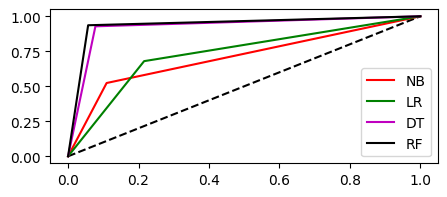

In [ ]:
plt.figure(figsize=(5,2))
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr_nb,tpr_nb,color='r',label='NB')
plt.plot(fpr_lr,tpr_lr,color='g',label='LR')
plt.plot(fpr_dt,tpr_dt,color='m',label='DT')
plt.plot(fpr_rf,tpr_rf,color='black',label='RF')
plt.legend(loc = 0)
plt.show()

### **Hyper Parameter Tuning**

In [ ]:
rf_algo = RandomForestClassifier(n_estimators=11)
rf_algo.fit(X_res , y_res)

RandomForestClassifier(n_estimators=11)

In [ ]:
# parameters = {
#     'n_estimators':[10,11,12],
#     'criterion':['gini','entropy'],
#     'max_depth':[2,3,4,5,6,7,10,11,14,20,25,30],
#     'min_samples_split':[2,3,4,5,6],
#     'min_samples_leaf':[2,3,4,5],
#     'class_weight':['balanced',None]
#     }


# grid_model = GridSearchCV(estimator=rf_algo,
#                           param_grid=parameters,
#                           scoring='accuracy',
#                           cv=10)

# grid_model1 = grid_model.fit(X_res,y_res)

In [ ]:
roc_auc_score(y_test , rf_preds)

0.9394992509605282

In [ ]:
with open("credit_card_model.pkl" , "wb") as f :
  pickle.dump(rf_algo , f)

In [ ]:
with open("Scaling_data.pkl" , "wb") as f :
  pickle.dump(ss , f)